In [14]:
#load data set from the kaggle
! pip install -q kaggle
#Make a directory named “.kaggle”
! mkdir ~/.kaggle
from google.colab import files
! cp /content/kaggle.json ~/.kaggle/
! cp /content/kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [15]:
! kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

 35% 9.00M/25.7M [00:00<00:00, 59.4MB/s]
100% 25.7M/25.7M [00:00<00:00, 102MB/s] 


In [16]:
! mkdir movie_data

mkdir: cannot create directory ‘movie_data’: File exists


In [17]:
! unzip /content/imdb-dataset-of-50k-movie-reviews.zip -d movie_data

Archive:  /content/imdb-dataset-of-50k-movie-reviews.zip
  inflating: movie_data/IMDB Dataset.csv  


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [19]:
data=pd.read_csv('movie_data/IMDB Dataset.csv')

In [20]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [21]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

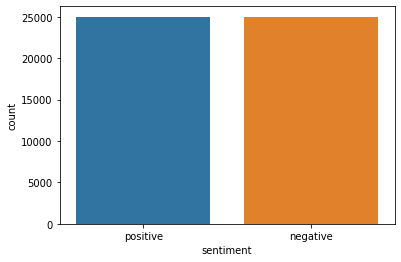

In [22]:
sns.countplot(x=data['sentiment'])

In [23]:
stop = set(STOPWORDS) 

In [48]:
#clean the text data
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

#Lemmatize the corpus
def lemma_traincorpus(text):
    lemmatizer=WordNetLemmatizer()
    out_data=""
    for words in text:
        out_data+= lemmatizer.lemmatize(words)
    return out_data

def tfidf(text):
    tfidfv = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000)
    fit_data_tfidf=tfidfv.fit_transform(data)
    return fit_data_tfidf
#Apply function on review column
data['review']=data['review'].apply(denoise_text)


In [49]:
data.sentiment.replace("positive" , 1 , inplace = True)
data.sentiment.replace("negative" , 0 , inplace = True)
data.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ex...,1
1,wonderful little filming technique fashion giv...,1
2,thought wonderful way spend time hot summer si...,1
3,basically family little boy thinks zombie clos...,0
4,petter time visually stunning film mattei offe...,1


**Positive Review**

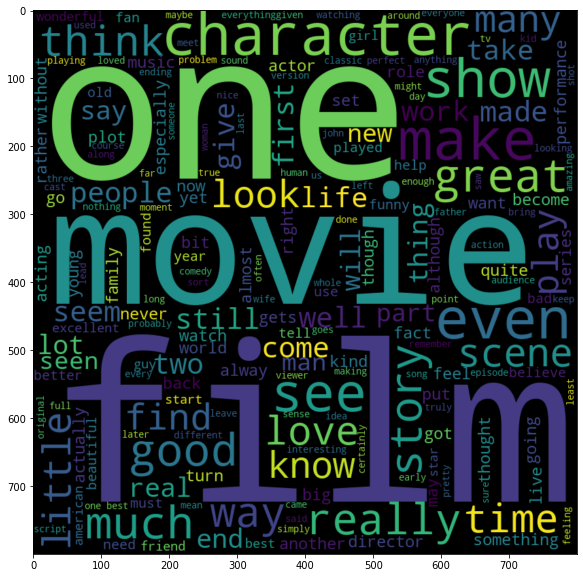

In [50]:
 plt.figure(figsize = (10,10))
 word_cloud= WordCloud(width = 800 , height = 800).generate(" ".join(data[data.sentiment == 1].review))
plt.imshow(word_cloud , interpolation = 'bilinear')

**Negative Review**

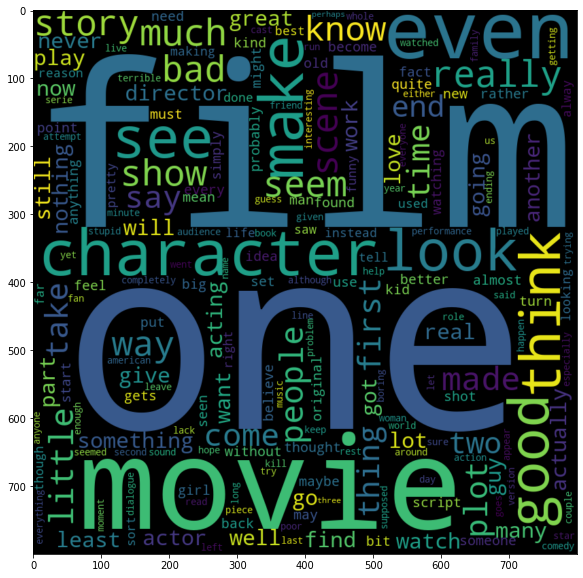

In [27]:
plt.figure(figsize = (10,10)) 
word_cloud = WordCloud(width = 800 , height = 800).generate(" ".join(data[data.sentiment == 0].review))
plt.imshow(word_cloud , interpolation = 'bilinear')

In [52]:
from sklearn import preprocessing,metrics,manifold
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import collections
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.preprocessing import RobustScaler
import xgboost
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from collections import Counter
from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.metrics import classification_report,confusion_matrix
from nltk.tokenize import word_tokenize
from collections import defaultdict
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import xgboost
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from collections import Counter
from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit


import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Dense,Flatten,Conv2D,Conv1D,GlobalMaxPooling1D,GlobalMaxPool1D
from tensorflow.keras.optimizers import Adam
import numpy as np  
import pandas as pd 
import keras.backend as k
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional,GRU
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

**Here we used 2 method lstm and encoding and decoding Approch check there Acuracy**

**Creating a Basic LSTM Neural Network
In this case, we will not be using an y pretrained static/dynamic embeddings but will be using a simple Neural Network model of LSTM to create our network.The steps are as follows:

Tokenize the input data
Creating the limits of Maxlen, Max Features and Embedding Size for our Embedding Matrix
Pad the tokenized data to maintain uniformity in length of the input features**

In [56]:
maxlen=1000
max_features=5000 
embed_size=300

train_y=data['sentiment']
train_x,test_x,train_y,test_y=train_test_split(data['review'],train_y,test_size=0.2,random_state=42)

val_x=test_x

val_x=test_x
#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)


Padded and Tokenized Training Sequence (40000, 1000)
Target Values Shape (40000,)
Padded and Tokenized Training Sequence (10000, 1000)
Target Values Shape (10000,)


In [59]:
model=Sequential()
model.add(Embedding(max_features,embed_size,input_length=maxlen))
model.add(LSTM(60))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
plot_model(
    model,
    to_file="simple_model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)
train_data=model.fit(train_x,train_y,batch_size=512,epochs=3,verbose=2)
print(train_data)

def plot_graph(history,string):
    
    plt.plot(history.history[string],label='training '+string)
    plt.plot(history.history['val_'+string],label='validation '+string)
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.title(string+' vs epochs')
    plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 300)         1500000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 60)                86640     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                976       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,587,633
Trainable params: 1,587,633
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
79/79 - 30s - loss: 0.4723 - accuracy: 0.7878
Epoch 2/3
79/79 - 28s - loss: 0.2848 - accuracy: 0.8852
Epoch 3/3
79/79 - 28s - loss: 0.2487 - accuracy: 0.9032


**For Validation data**

In [58]:
#Fit and validate
model.fit(train_x,train_y,batch_size=128,epochs=3,verbose=2,validation_data=(val_x,val_y))

Epoch 1/3
313/313 - 51s - loss: 0.2714 - accuracy: 0.8880 - val_loss: 0.3361 - val_accuracy: 0.8572
Epoch 2/3
313/313 - 51s - loss: 0.2156 - accuracy: 0.9143 - val_loss: 0.3571 - val_accuracy: 0.8608
Epoch 3/3
313/313 - 51s - loss: 0.1887 - accuracy: 0.9248 - val_loss: 0.3727 - val_accuracy: 0.8494


***The key benefits of the approach are the ability to train a single end-to-end model directly on source and target sentences and the ability to handle variable length input and output sequences of text.*

More detail :-https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html***

In [63]:
maxlen=1000
max_features=5000 
embed_size=300

#clean some null words or use the previously cleaned & lemmatized corpus

train_y=data['sentiment']
train_x,test_x,train_y,test_y=train_test_split(data['review'],train_y,test_size=0.2,random_state=0)

val_x=test_x

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)
val_y=test_y
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)

#sequence to sequence basic lstm encoder gru decoders
def seq2seq_encoder_decoder(maxlen,max_features,embed_size):
    #Creating LSTM  encoder neural model with no pretrained embeddings
    encoder_inp=Input(shape=(maxlen,))
    encoder_embed=Embedding(max_features,embed_size,input_length=maxlen,trainable=True)(encoder_inp)
    encoder_lstm_cell=LSTM(60,return_state='True')
    encoder_outputs,encoder_state_lstm_h,encoder_state_lstm_c=encoder_lstm_cell(encoder_embed)
    print(f'Encoder Ouputs Shape{encoder_outputs.shape}')
    #Creating LSTM decoder model and feeding the output states (h,c) of lstm of encoders
    decoder_inp=Input(shape=(maxlen,))
    decoder_embed=Embedding(max_features,embed_size,input_length=maxlen,trainable=True)(decoder_inp)
    decoder_lstm_cell=LSTM(60,return_sequences='True',return_state=True)
    decoder_outputs,decoder_state_lstm_h,decoder_state_lstm_c=decoder_lstm_cell(decoder_embed,initial_state=[encoder_state_lstm_h,encoder_state_lstm_c])
    decoder_dense_cell=Dense(16,activation='relu')
    decoder_d_output=decoder_dense_cell(decoder_outputs)
    decoder_dense_cell2=Dense(1,activation='sigmoid')
    decoder_output=decoder_dense_cell2(decoder_d_output)
    model=Model([encoder_inp,decoder_inp],decoder_output)
    model.summary()
    return model
    
    
model=seq2seq_encoder_decoder(maxlen,max_features,embed_size)  
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
plot_model(
    model,to_file="seq2seq_encoder_decoder_model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96)
    
model.fit([train_x,train_x],train_y,batch_size=512,epochs=3,verbose=2)


Padded and Tokenized Training Sequence (40000, 1000)
Target Values Shape (40000,)
Padded and Tokenized Training Sequence (10000, 1000)
Target Values Shape (10000,)
Encoder Ouputs Shape(None, 60)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1000)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1000)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1000, 300)    1500000     input_1[0][0]                    
_________________________________________________________________________________________________

**#here we get 52 percent accuracy if we incrase  the epoch and increase the layer defently get good accuracy**

colab for link:-https://colab.research.google.com/drive/14OA5CuD1NAT3cwmp_NLRTAkHEVKVVjoP?usp=sharing

**Thank you**


Gtihub:-(https://github.com/RAGHAVJHA01)

Kaggle:-https://www.kaggle.com/raghavjha858